In [1]:
import dagshub
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import mlflow
import sys

In [2]:
df = pd.read_csv('../../data/processed/gurgaon_properties_post_feature_selection.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3544 non-null   float64
 1   sector           3544 non-null   float64
 2   bedRoom          3544 non-null   int64  
 3   bathroom         3544 non-null   int64  
 4   balcony          3544 non-null   float64
 5   agePossession    3544 non-null   float64
 6   built_up_area    3544 non-null   float64
 7   servant room     3544 non-null   int64  
 8   store room       3544 non-null   int64  
 9   furnishing_type  3544 non-null   int64  
 10  luxury_category  3544 non-null   float64
 11  floor_category   3544 non-null   float64
 12  price            3544 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 360.1 KB


In [4]:
df.describe()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
count,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,0.209368,56.864842,3.185948,3.260722,2.724323,2.128104,1844.961941,0.356941,0.089729,0.389673,1.271445,1.280192,2.409478
std,0.406915,32.633418,1.369444,1.441012,1.142125,1.281872,1192.853881,0.479165,0.285834,0.584604,0.690419,0.809339,2.758567
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
25%,0.000000,28.000000,2.000000,2.000000,2.000000,1.000000,1200.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.950000
50%,0.000000,63.000000,3.000000,3.000000,3.000000,3.000000,1611.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.500000
75%,0.000000,87.000000,4.000000,4.000000,4.000000,3.000000,2191.500000,1.000000,0.000000,1.000000,2.000000,2.000000,2.600000
max,1.000000,103.000000,10.000000,12.000000,4.000000,4.000000,12222.000000,1.000000,1.000000,2.000000,2.000000,2.000000,31.500000


In [5]:
X = df.drop(columns=['price'])
y = df['price']

In [6]:
X.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0


<Axes: ylabel='Frequency'>

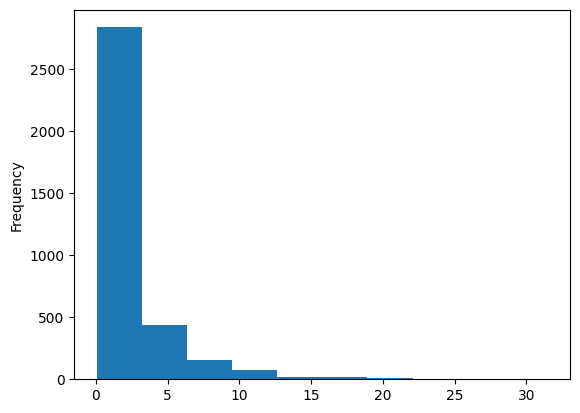

In [7]:
y.plot(kind='hist')

By transforming we are getting distribution near to normal distribution.

<Axes: ylabel='Frequency'>

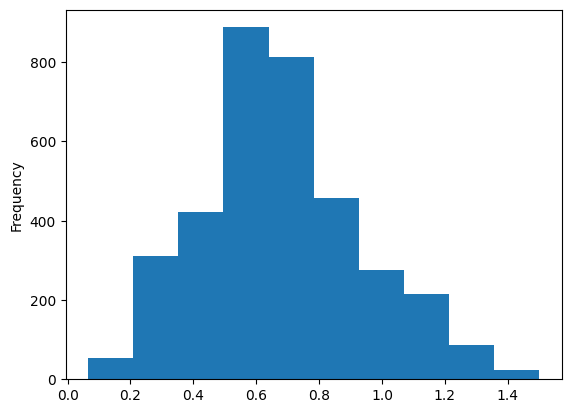

In [9]:
y = np.log1p(y)
y.plot(kind = 'hist')

In [10]:
columns_to_scale = ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

In [12]:
import dagshub
import mlflow

dagshub.init(repo_owner='kevalsakhiya', repo_name='property-scout', mlflow=True)
mlflow.set_tracking_uri('https://dagshub.com/kevalsakhiya/property-scout.mlflow')



Accessing as kevalsakhiya

Initialized MLflow to track repo "kevalsakhiya/property-scout"

Repository kevalsakhiya/property-scout initialized!

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import mlflow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dict = {
        'linear-regression': LinearRegression(),
        'decision-tree': DecisionTreeRegressor(),
        'random-forest': RandomForestRegressor(),
        'gradient-doost': GradientBoostingRegressor(),
        'ada-boost': AdaBoostRegressor(),
        'svr': SVR(),
        'k-nearest-neighbout': KNeighborsRegressor(),
        'xgboost': XGBRegressor()
    }
mlflow.set_experiment('all-models')

for name, model in model_dict.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Logging metrics to MLflow
        mlflow.log_metric('mse', mse)
        mlflow.log_metric('r2_score', r2)
        mlflow.log_params(model.get_params())

        print(name, 'mse=', mse)
        print(name, 'r2_score=', r2)

linear-regression mse= 0.010842941799789561
linear-regression r2_score= 0.8264536392106752


2024/08/01 17:54:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run linear-regression at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/d54ebf18d9144587979412ec7157ee29.
2024/08/01 17:54:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


decision-tree mse= 0.013333947995871448
decision-tree r2_score= 0.7865839186112284


2024/08/01 17:54:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run decision-tree at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/13fe5338ca574168bc5b168fe532fa38.
2024/08/01 17:54:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


random-forest mse= 0.008100236992996212
random-forest r2_score= 0.8703519139342019


2024/08/01 17:54:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run random-forest at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/a30d92a2b3c948f89580fdea46f30386.
2024/08/01 17:54:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


gradient-doost mse= 0.00923352465116255
gradient-doost r2_score= 0.85221311429534


2024/08/01 17:55:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run gradient-doost at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/99aab06b6df94c97b68fc6cb204c1947.
2024/08/01 17:55:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


ada-boost mse= 0.017271120407937587
ada-boost r2_score= 0.7235676305474608


2024/08/01 17:55:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run ada-boost at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/eef4aa77bdd34dcfa49c5f4d9139d8c8.
2024/08/01 17:55:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


svr mse= 0.008760693346241561
svr r2_score= 0.8597810007371816


2024/08/01 17:55:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run svr at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/fc4f2bf55f104e32b4fc572a5608b0af.
2024/08/01 17:55:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


k-nearest-neighbout mse= 0.013055307102325511
k-nearest-neighbout r2_score= 0.7910436965879877


2024/08/01 17:55:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run k-nearest-neighbout at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/ea01388e77c64e809290d443c1cc855b.
2024/08/01 17:55:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.


xgboost mse= 0.007061672029352331
xgboost r2_score= 0.8869746324926646


2024/08/01 17:55:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run xgboost at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3/runs/fc3a49748e0d4cfab0c3e9b19e6fe656.
2024/08/01 17:55:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/kevalsakhiya/property-scout.mlflow/#/experiments/3.
